In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
from scipy import stats


In [9]:
mean = (10,20)
cov = 7*np.array([(1,-0.5),(-0.5,1)])
my_GMM_hill_1 = np.random.multivariate_normal(mean, cov, 120)
my_GMM_hill_2 = np.random.multivariate_normal(mean, cov, 120)

x_for_normal = my_GMM_hill_1[:,0]
y_for_normal = my_GMM_hill_1[:,1]

x_for_normal_mix = my_GMM_hill_2[:,0]
y_for_normal_mix = my_GMM_hill_2[:,1]

x_for_uniform = np.random.uniform(1, 100, 120)
y_for_uniform = np.random.uniform(1, 100, 120)

x_total = np.hstack((x_for_uniform, x_for_normal_mix))
y_total = np.hstack((y_for_uniform, y_for_normal_mix))



(-2.910483136128717,
 103.12666096700461,
 -2.750553383795059,
 102.97785735149772)

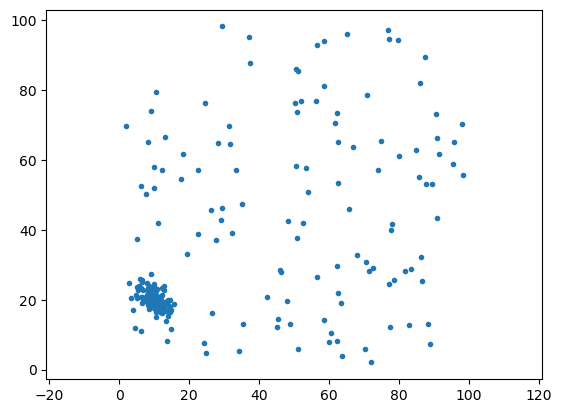

In [10]:
plt.plot(x_total, y_total, '.')
plt.axis('equal')

In [127]:
normal_scatter_data = np.vstack((x_for_normal, y_for_normal)).T
uniform_scatter_data = np.vstack((x_for_uniform, y_for_uniform)).T
total_scatter_data = np.vstack((x_total, y_total)).T

In [152]:
kernel_for_kde = 'gaussian'
bandwidth_for_kde = 1


In [153]:
kde_for_normal = KernelDensity(kernel=kernel_for_kde, bandwidth=bandwidth_for_kde).fit(normal_scatter_data)
kde_for_uniform = KernelDensity(kernel=kernel_for_kde, bandwidth=bandwidth_for_kde).fit(uniform_scatter_data)
kde_for_total = KernelDensity(kernel=kernel_for_kde, bandwidth=bandwidth_for_kde).fit(total_scatter_data)

In [154]:
kde_res_for_normal = kde_for_normal.score_samples(normal_scatter_data)
kde_res_for_uniform = kde_for_uniform.score_samples(uniform_scatter_data)
kde_res_for_total = kde_for_total.score_samples(total_scatter_data)

In [155]:
kde_heatmap_total = np.histogram2d(x_total, y_total, bins =(15,15), weights = kde_res_for_total)
kde_heatmap_total_bins = kde_heatmap_total[1]
kde_heatmap_total_vals = kde_heatmap_total[0]

kde_heatmap_uniform = np.histogram2d(x_for_uniform, y_for_uniform, bins = kde_heatmap_total_bins , weights = kde_res_for_uniform)
kde_heatmap_uniform_bins = kde_heatmap_uniform[1]
kde_heatmap_uniform_vals = kde_heatmap_uniform[0]

kde_heatmap_normal = np.histogram2d(x_for_normal, y_for_normal,bins = kde_heatmap_total_bins, weights = kde_res_for_normal)
kde_heatmap_normal_bins = kde_heatmap_normal[1]
kde_heatmap_normal_vals = kde_heatmap_normal[0]



In [156]:
pdf_vals_total = (kde_heatmap_total_vals - kde_heatmap_total_vals.max())/kde_heatmap_total_vals.sum()
pdf_vals_uniform = (kde_heatmap_uniform_vals - kde_heatmap_uniform_vals.max())/kde_heatmap_uniform_vals.sum()
pdf_vals_normal = (kde_heatmap_normal_vals - kde_heatmap_normal_vals.max())/kde_heatmap_normal_vals.sum()

<Axes: >

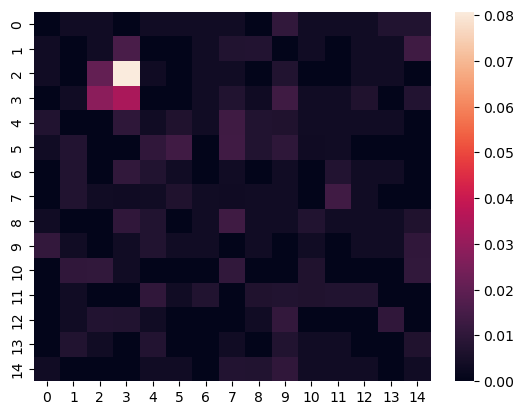

In [157]:
sns.heatmap(pdf_vals_total)

<Axes: >

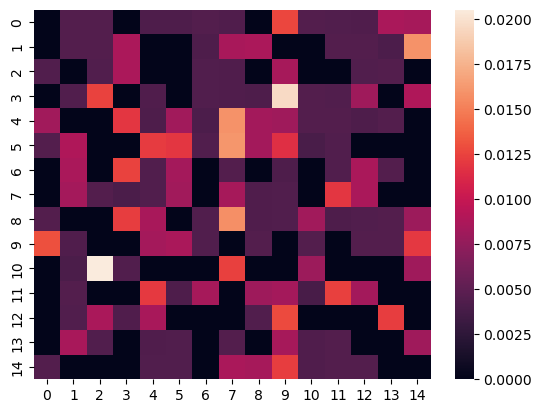

In [158]:
sns.heatmap(pdf_vals_uniform)

<Axes: >

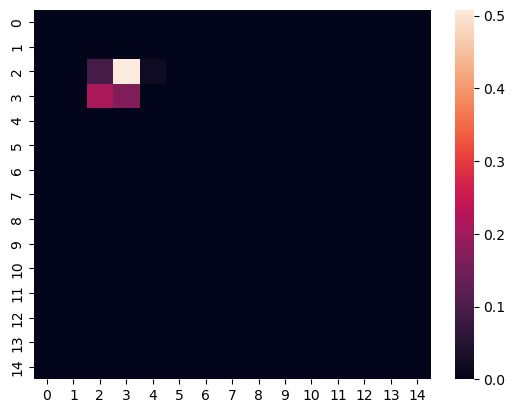

In [159]:
sns.heatmap(pdf_vals_normal)

<Axes: >

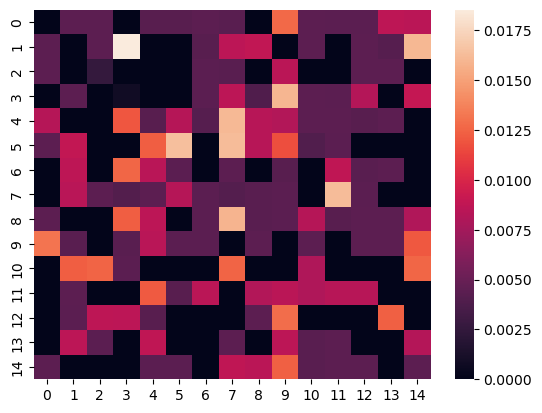

In [160]:
sampling_distribution = pdf_vals_total-0.2*pdf_vals_normal
sampling_distribution[sampling_distribution < 0] = 0
sampling_distribution = sampling_distribution/sampling_distribution.sum()
sns.heatmap(sampling_distribution)

In [161]:
def entropy_count(values):
    log_values = np.zeros_like(values)
    log_values[values <= 0] = 0
    log_values[values > 0] = np.log(values[values > 0])
    entropy = -(log_values * values).sum()
    return entropy

In [162]:
entropy_of_computed = entropy_count(sampling_distribution)
entropy_of_normal =  entropy_count(pdf_vals_normal)
entropy_of_uniform = entropy_count(pdf_vals_uniform)
entropy_of_total = entropy_count(pdf_vals_total)

In [169]:
entropy_of_normal

1.2693480551975131

In [259]:
def sampledistribution_from_given_pdf(pdf_heatmap, size_of_sample):
    bin_number = np.arange(len(pdf_heatmap.reshape((-1,1))))
    pdf_vect = pdf_heatmap.reshape((-1,1)).squeeze()
    custom_sample_gen = stats.rv_discrete(name='custom_sample_gen', values=(bin_number, pdf_vect))
    cust_sample = custom_sample_gen.rvs(size = size_of_sample)
    tmp_histogram = np.histogram(cust_sample, bins = range(len(pdf_heatmap.reshape((-1,1)))+1) )
    result_distribution = tmp_histogram[0].reshape(pdf_heatmap.shape)
    result_distribution = result_distribution/result_distribution.sum()
    return result_distribution

<Axes: >

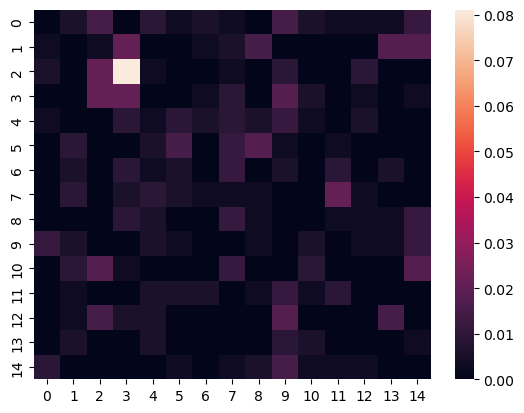

In [262]:
sns.heatmap(sampledistribution_from_given_pdf(pdf_vals_total, 333))